In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('sign_mnist_train.csv') # Since train data is too large to put it into Github, it is recommended to download it and save it in workplace.
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [3]:
y_train = data['label']
X_train = data.drop(columns = 'label')

In [5]:
test = pd.read_csv('sign_mnist_test.csv') # Since train data is too large to put it into Github, it is recommended to download it and save it in workplace.
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [6]:
y_test = test['label']
X_test = test.drop(columns = 'label')

In [7]:
from tensorflow.keras import layers, models

In [8]:
# Normalize the data
X_train /= 255.0
X_test /= 255.0

In [9]:
X_train = X_train.values
X_test = X_test.values

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [34]:
model_l2 = models.Sequential();
model_l2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_l2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_l2.add(layers.Flatten())
model_l2.add(layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_l2.add(layers.Dense(25, kernel_regularizer='l2'))

In [36]:
model_l2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [37]:
model_l2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model_l2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/10
858/858 [==============================] - 48s 56ms/step - loss: 1.5364 - accuracy: 0.5982 - val_loss: 0.9413 - val_accuracy: 0.7701
Epoch 2/10
858/858 [==============================] - 41s 48ms/step - loss: 0.4980 - accuracy: 0.9139 - val_loss: 0.7329 - val_accuracy: 0.8339
Epoch 3/10
858/858 [==============================] - 46s 53ms/step - loss: 0.3066 - accuracy: 0.9732 - val_loss: 0.6406 - val_accuracy: 0.8724
Epoch 4/10
858/858 [==============================] - 59s 69ms/step - loss: 0.2316 - accuracy: 0.9860 - val_loss: 0.5961 - val_accuracy: 0.8883
Epoch 5/10
858/858 [==============================] - 42s 48ms/step - loss: 0.1909 - accuracy: 0.9893 - val_loss: 0.8911 - val_accuracy: 0.8091
Epoch 6/10
858/858 [==============================] - 43s 50ms/step - loss: 0.1764 - accuracy: 0.9889 - val_loss: 0.5519 - val_accuracy: 0.8974
Epoch 7/10
858/858 [==============================] - 42s 48ms/step - loss: 0.1516 - accuracy: 0.9907 - val_loss: 0.5001 - val_accuracy:

225/225 - 1s - loss: 0.4395 - accuracy: 0.9211


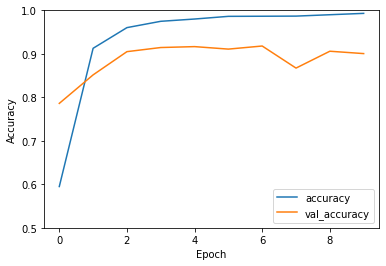

In [53]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_l2.evaluate(X_test,  y_test, verbose=2)

In [54]:
print(test_acc)

0.9210819602012634


In [55]:
model_es = models.Sequential();
model_es.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_es.add(layers.MaxPooling2D((2, 2)))
model_es.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_es.add(layers.MaxPooling2D((2, 2)))
model_es.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_es.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_es.add(layers.Flatten())
model_es.add(layers.Dense(64, activation='relu'))
model_es.add(layers.Dense(25))

In [57]:
model_es.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)               

In [43]:
model_es.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model_es.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/10
858/858 [==============================] - 50s 59ms/step - loss: 1.1615 - accuracy: 0.6440 - val_loss: 0.6155 - val_accuracy: 0.8031
Epoch 2/10
858/858 [==============================] - 43s 50ms/step - loss: 0.1143 - accuracy: 0.9689 - val_loss: 0.5557 - val_accuracy: 0.8574
Epoch 3/10
858/858 [==============================] - 30s 35ms/step - loss: 0.0310 - accuracy: 0.9929 - val_loss: 0.5287 - val_accuracy: 0.8865
Epoch 4/10
858/858 [==============================] - 36s 42ms/step - loss: 0.0148 - accuracy: 0.9962 - val_loss: 0.5275 - val_accuracy: 0.9112
Epoch 5/10
858/858 [==============================] - 48s 56ms/step - loss: 0.0145 - accuracy: 0.9958 - val_loss: 0.5344 - val_accuracy: 0.8755
Epoch 6/10
858/858 [==============================] - 44s 51ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.4429 - val_accuracy: 0.9141
Epoch 7/10
858/858 [==============================] - 39s 45ms/step - loss: 3.9382e-04 - accuracy: 1.0000 - val_loss: 0.4879 - val_accur

225/225 - 1s - loss: 0.5528 - accuracy: 0.9211


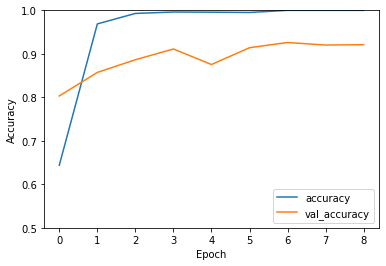

In [44]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_es.evaluate(X_test,  y_test, verbose=2)

In [45]:
print(test_acc)

0.9210819602012634


In [46]:
model_dropout = models.Sequential();
model_dropout.add(layers.Conv2D(5, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_dropout.add(layers.Dropout(0.2))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_dropout.add(layers.Dropout(0.2))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_dropout.add(layers.Dropout(0.2))
model_dropout.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
dropout_3 (Dropout)          (None, 26, 26, 5)         0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 32)        1472      
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 64)         

In [47]:
model_dropout.add(layers.Flatten())
model_dropout.add(layers.Dense(64, activation='relu'))
model_dropout.add(layers.Dense(25))

In [48]:
model_dropout.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
dropout_3 (Dropout)          (None, 26, 26, 5)         0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 32)        1472      
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 64)         

In [49]:
model_dropout.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model_dropout.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
858/858 [==============================] - 26s 30ms/step - loss: 1.2900 - accuracy: 0.5949 - val_loss: 0.7317 - val_accuracy: 0.7861
Epoch 2/10
858/858 [==============================] - 29s 34ms/step - loss: 0.2631 - accuracy: 0.9128 - val_loss: 0.4542 - val_accuracy: 0.8516
Epoch 3/10
858/858 [==============================] - 31s 36ms/step - loss: 0.1215 - accuracy: 0.9603 - val_loss: 0.3452 - val_accuracy: 0.9050
Epoch 4/10
858/858 [==============================] - 20s 23ms/step - loss: 0.0762 - accuracy: 0.9748 - val_loss: 0.3297 - val_accuracy: 0.9145
Epoch 5/10
858/858 [==============================] - 17s 20ms/step - loss: 0.0594 - accuracy: 0.9801 - val_loss: 0.2876 - val_accuracy: 0.9166
Epoch 6/10
858/858 [==============================] - 19s 22ms/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.3184 - val_accuracy: 0.9109
Epoch 7/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0420 - accuracy: 0.9865 - val_loss: 0.3107 - val_accuracy:

225/225 - 1s - loss: 0.3673 - accuracy: 0.9006


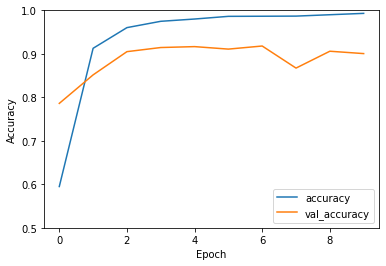

In [50]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_dropout.evaluate(X_test,  y_test, verbose=2)

In [51]:
print(test_acc)

0.9005855917930603


Models below are variations of the original model with different number of layers and hyperparameters:

In [58]:
# This model has an extra maxpooling layer
model_3_max_pool = models.Sequential();
model_3_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3_max_pool.add(layers.MaxPooling2D((2, 2)))
model_3_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3_max_pool.add(layers.MaxPooling2D((2, 2)))
model_3_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3_max_pool.add(layers.MaxPooling2D((2, 2)))
model_3_max_pool.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 1, 1, 64)          0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________

In [59]:
model_3_max_pool.add(layers.Flatten())
model_3_max_pool.add(layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_3_max_pool.add(layers.Dense(25, kernel_regularizer='l2'))

In [60]:
model_3_max_pool.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)              

In [62]:
model_3_max_pool.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model_3_max_pool.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/10
858/858 [==============================] - 36s 42ms/step - loss: 2.0763 - accuracy: 0.4117 - val_loss: 1.2694 - val_accuracy: 0.6449
Epoch 2/10
858/858 [==============================] - 43s 51ms/step - loss: 0.7935 - accuracy: 0.8049 - val_loss: 0.9534 - val_accuracy: 0.7582
Epoch 3/10
858/858 [==============================] - 40s 47ms/step - loss: 0.5004 - accuracy: 0.9078 - val_loss: 0.7579 - val_accuracy: 0.8268
Epoch 4/10
858/858 [==============================] - 48s 56ms/step - loss: 0.3556 - accuracy: 0.9559 - val_loss: 0.8024 - val_accuracy: 0.8137
Epoch 5/10
858/858 [==============================] - 38s 44ms/step - loss: 0.2749 - accuracy: 0.9781 - val_loss: 0.6337 - val_accuracy: 0.8667
Epoch 6/10
858/858 [==============================] - 42s 49ms/step - loss: 0.2278 - accuracy: 0.9856 - val_loss: 0.5830 - val_accuracy: 0.8731
Epoch 7/10
858/858 [==============================] - 38s 44ms/step - loss: 0.1847 - accuracy: 0.9930 - val_loss: 0.6437 - val_accuracy:

225/225 - 2s - loss: 0.5917 - accuracy: 0.8504


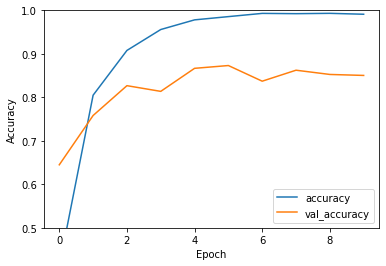

In [63]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_3_max_pool.evaluate(X_test,  y_test, verbose=2)

In [64]:
print(test_acc)

0.8503904342651367
